In [1]:
# Importing libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
from sklearn.model_selection import train_test_split as split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import confusion_matrix as CM
from sklearn import preprocessing

In [2]:
# Load data into dataframe

url = 'sensor_condición.csv'

df_sensors = pd.read_csv(url)

In [3]:
df_sensors.head()

,Activo_id,ciclo,s1,s2,s3,s4,s5,s6,s7,s8,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,condicion
0,1,1,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,...,2388.02,8138.62,8.4195,0.03,392,2388,100,39.06,23.4190,0
1,1,2,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,...,2388.07,8131.49,8.4318,0.03,392,2388,100,39.00,23.4236,0
2,1,3,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,...,2388.03,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442,0
3,1,4,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,...,2388.08,8133.83,8.3682,0.03,392,2388,100,38.88,23.3739,0
4,1,5,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,...,2388.04,8133.80,8.4294,0.03,393,2388,100,38.90,23.4044,0


In [4]:
# Validamos que valores puede tomar la variable dependiente condicion

df_sensors.condicion.unique()

array([0, 1])

#### Validamos que las columnas tienen valores constantes (se conoce porque es el dataset de las clases)

In [5]:
df_sensors.s1.describe()
df_sensors.s5.describe()
df_sensors.s6.describe()
df_sensors.s10.describe()
df_sensors.s16.describe()
df_sensors.s18.describe()
df_sensors.s19.describe()

count    4168.0
mean      100.0
std         0.0
min       100.0
25%       100.0
50%       100.0
75%       100.0
max       100.0
Name: s19, dtype: float64

#### Eliminamos los valores constantes

In [6]:
df_sensors = df_sensors.drop(['s1', 's5', 's6', 's10', 's16', 's18', 's19'], axis = 1)

#### Validamos que no tengamos valores nulos dentro del dataset

In [7]:
df_sensors.isnull().sum()

Activo_id    0
ciclo        0
s2           0
s3           0
s4           0
s7           0
s8           0
s9           0
s11          0
s12          0
s13          0
s14          0
s15          0
s17          0
s20          0
s21          0
condicion    0
dtype: int64

## Pregunta Nº 1 

> Realizar un modelo de regresión logística con la data sensor condicion.xlsx utilizar las variable condicion como target, y s1 hasta s21 como predictoras

In [8]:
varX = df_sensors.iloc[:,2:-1].values
varY = df_sensors.iloc[:,-1].values

pd.DataFrame(varX).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392.0,39.06,23.4190
1,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392.0,39.00,23.4236
2,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390.0,38.95,23.3442
3,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392.0,38.88,23.3739
4,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393.0,38.90,23.4044


In [9]:
pd.DataFrame(varY).head()

,0
0,0
1,0
2,0
3,0
4,0


In [10]:
X_train, X_test, y_train, y_test = split(varX, varY, test_size = 0.25, random_state=0)
print(X_train.shape,X_test.shape)

(3126, 14) (1042, 14)


In [11]:
# Escalar los valores predictores

escaler = MinMaxScaler()
X_train = escaler.fit_transform(X_train.astype('float64'))
X_test  = escaler.transform(X_test.astype('float64'))

X_test[:5,:]

array([[0.40247678, 0.54203852, 0.63639922, 0.42806394, 0.36206897,
        0.26143191, 0.58      , 0.46335697, 0.33823529, 0.2820373 ,
        0.61978947, 0.4       , 0.36220472, 0.22620669],
       [0.29102167, 0.13644904, 0.14344423, 0.70870337, 0.12068966,
        0.18781819, 0.2       , 0.77777778, 0.16176471, 0.17286509,
        0.48757895, 0.3       , 0.78740157, 0.80299591],
       [0.54798762, 0.53123532, 0.62641879, 0.23268206, 0.56896552,
        0.10892996, 0.67333333, 0.3144208 , 0.58823529, 0.06172974,
        0.60926316, 0.6       , 0.30708661, 0.35648358],
       [0.26315789, 0.18060122, 0.24853229, 0.75843694, 0.20689655,
        0.16277576, 0.28666667, 0.73522459, 0.27941176, 0.1816992 ,
        0.33515789, 0.2       , 0.71653543, 0.61703737],
       [0.33126935, 0.23132926, 0.02093933, 0.75666075, 0.06896552,
        0.13621979, 0.22      , 0.76359338, 0.27941176, 0.13807394,
        0.27705263, 0.4       , 0.74015748, 0.52519292]])

In [12]:
# Ajustamos o entrenamos el modelo

classifier = LR(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [13]:
dataPredict = classifier.predict(X_test)
dataPredict

array([0, 0, 0, ..., 0, 0, 0])

In [14]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [15]:
comparisonTable = pd.DataFrame(np.vstack([dataPredict, y_test])).T

comparison_column = np.where(comparisonTable[0] == comparisonTable[1], True, False)

comparisonTable["assert"] = comparison_column
comparisonTable

,0,1,assert
0,0,0,True
1,0,0,True
2,0,0,True
3,0,0,True
4,0,0,True
...,...,...,...
1037,0,0,True
1038,0,0,True
1039,0,0,True
1040,0,0,True


In [16]:
len(comparisonTable[comparisonTable["assert"] == False])

20

In [29]:
(20/1042)

0.019193857965451054

In [18]:
# Creamos la Matriz de Confusión para evaluar la clasificación realizada mediante sklearn

matrix = CM(y_test, dataPredict)
matrix

array([[933,   7],
       [ 13,  89]])

In [30]:
score = (933+89) / matrix.sum()
score

0.980806142034549

> De las 1042 pruebas (data de test), solo ha fallado en 20 predicciones. Tenemos un error del 1.9%.

**Es decir, tenemos el 98.1 % de exactitud.**


## Pregunta Nº 2 

> Verificar correlaciones entre variables predictoras, indicar si existe problema de multicolinealidad entre las variables predictoras. (si hay problema entre que variables??)


In [20]:
# Normalizamos la data con el método preprocessing de la libreria de sklearn.

normalizedData = preprocessing.normalize(df_sensors.iloc[:,2:-1])
pd.DataFrame(normalizedData)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.049948,0.123715,0.108999,0.043142,0.185846,0.704001,0.003694,0.040597,0.185843,0.633371,0.000655,0.030507,0.003040,0.001823
1,0.049995,0.123933,0.109243,0.043113,0.185923,0.704134,0.003697,0.040663,0.185925,0.633085,0.000656,0.030520,0.003036,0.001824
2,0.049984,0.123567,0.109266,0.043129,0.185825,0.704443,0.003678,0.040651,0.185821,0.632877,0.000655,0.030347,0.003031,0.001816
3,0.049995,0.123190,0.109109,0.043153,0.185869,0.704330,0.003668,0.040695,0.185867,0.633064,0.000651,0.030510,0.003026,0.001819
4,0.049979,0.123152,0.109410,0.043104,0.185801,0.704529,0.003679,0.040629,0.185800,0.632844,0.000656,0.030577,0.003027,0.001821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4163,0.049978,0.124691,0.111162,0.042882,0.185463,0.704541,0.003740,0.040391,0.185463,0.632443,0.000659,0.030752,0.002998,0.001796
4164,0.049990,0.124481,0.111001,0.042766,0.185417,0.704603,0.003758,0.040352,0.185417,0.632477,0.000658,0.030822,0.003008,0.001785
4165,0.050000,0.124876,0.111213,0.042816,0.185469,0.704805,0.003741,0.040327,0.185471,0.632102,0.000662,0.030830,0.002977,0.001797
4166,0.049992,0.124366,0.111582,0.042830,0.185416,0.704719,0.003744,0.040369,0.185414,0.632267,0.000660,0.030744,0.002986,0.001784


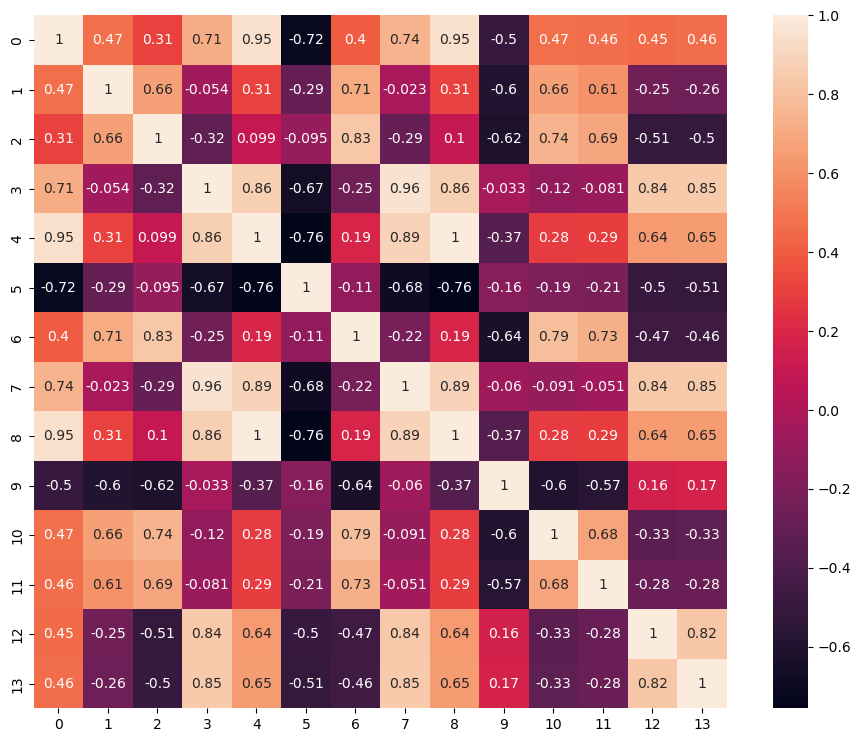

In [21]:
# Crearemos un heatmap para validar mediante un cuadro de correlación si las variables independientes tiene multicolinealidad
# Matriz de correlación:

plt.figure(figsize=(12,9))
corrmat = pd.DataFrame(normalizedData).corr()
sns.heatmap(corrmat, square=True, annot=True);
plt.show()

In [22]:
df_sensors.iloc[:,2:-1].head()

,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21
0,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
3,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
4,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044


Se valida que existen features (variables independientes) con multicolinealidad; es decir, existen variables que podrían depurarse porque su existencia dentro del dataset no agrega valor para predecir la condición.

Algunas variables que presentan este problema son:


| Variable 1 | Variable 2 |
|----|----|
| S1 | S2 |
| S1 | S5 |
| S1 | S6 |
| S1 | S8 |
| S1 | S13 |
| S1 | S16 |
| S1 | S18 |
| S1 | S19 |
| S2 | S5 |
| S2 | S6 |
| S2 | S8 |
| S2 | S13 |
...
...
...

> Esto también se debe a que existen features con valores constantes.

## Pregunta Nº 3 

> Escoger 3 variables predictoras y verificar la fuerza de asociación con la variable target condición (asociación entre variable numérica con categórica)

In [23]:
%load_ext rpy2.ipython

In [24]:
%%R

data_sensors = read.csv(file = 'sensor_condición.csv', sep = ',')

data_sensors$s1 = NULL
data_sensors$s5 = NULL
data_sensors$s6 = NULL
data_sensors$s10 = NULL
data_sensors$s16 = NULL
data_sensors$s18 = NULL
data_sensors$s19 = NULL

head(data_sensors) 

  Activo_id ciclo     s2      s3      s4     s7      s8      s9   s11    s12
1         1     1 641.82 1589.70 1400.60 554.36 2388.06 9046.19 47.47 521.66
2         1     2 642.15 1591.82 1403.14 553.75 2388.04 9044.07 47.49 522.28
3         1     3 642.35 1587.99 1404.20 554.26 2388.08 9052.94 47.27 522.42
4         1     4 642.35 1582.79 1401.87 554.45 2388.11 9049.48 47.13 522.86
5         1     5 642.37 1582.85 1406.22 554.00 2388.06 9055.15 47.28 522.19
6         1     6 642.10 1584.47 1398.37 554.67 2388.02 9049.68 47.16 521.68
      s13     s14    s15 s17   s20     s21 condicion
1 2388.02 8138.62 8.4195 392 39.06 23.4190         0
2 2388.07 8131.49 8.4318 392 39.00 23.4236         0
3 2388.03 8133.23 8.4178 390 38.95 23.3442         0
4 2388.08 8133.83 8.3682 392 38.88 23.3739         0
5 2388.04 8133.80 8.4294 393 38.90 23.4044         0
6 2388.03 8132.85 8.4108 391 38.98 23.3669         0


In [25]:
%%R

install.packages('CTT')
library(CTT) 

--- Please select a CRAN mirror for use in this session ---
Secure CRAN mirrors 

 1: 0-Cloud [https]
 2: Australia (Canberra) [https]
 3: Australia (Melbourne 1) [https]
 4: Australia (Melbourne 2) [https]
 5: Australia (Perth) [https]
 6: Austria [https]
 7: Belgium (Brussels) [https]
 8: Brazil (PR) [https]
 9: Brazil (RJ) [https]
10: Brazil (SP 1) [https]
11: Brazil (SP 2) [https]
12: Bulgaria [https]
13: Canada (MB) [https]
14: Canada (ON 2) [https]
15: Canada (ON 3) [https]
16: Chile (Santiago) [https]
17: China (Beijing 2) [https]
18: China (Hefei) [https]
19: China (Hong Kong) [https]
20: China (Guangzhou) [https]
21: China (Lanzhou) [https]
22: China (Nanjing) [https]
23: China (Shanghai 1) [https]
24: China (Shanghai 2) [https]
25: China (Shenzhen) [https]
26: Costa Rica [https]
27: Cyprus [https]
28: Czech Republic [https]
29: Denmark [https]
30: East Asia [https]
31: Ecuador (Cuenca) [https]
32: Ecuador (Quito) [https]
33: Estonia [https]
34: France (Lyon 1) [https]
35: Fra

R[write to console]: trying URL 'https://cran-r.c3sl.ufpr.br/src/contrib/CTT_2.3.3.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 17062 bytes (16 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: 

In [26]:
%%R

polyserial(data_sensors$s2, data_sensors$condicion)

          
0.8390407 


In [27]:
%%R

polyserial(data_sensors$s9, data_sensors$condicion)

          
0.4462293 


In [28]:
%%R


polyserial(data_sensors$s14, data_sensors$condicion)

          
0.3866612 


Mientras que la variable numérica **S2** tiene una **asociación muy fuerte** con la variable categórica **condición**, las variables numéricas **s9** y **s14** tiene una **asociación modeada** con la variable categórica **condición**.

## Pregunta Nº 4 

> Crear un histograma que muestre en que valor de ciclos es más probable la falla de los aviones